In [8]:
%%HTML
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

In [9]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import pymysql

## Definitions

In [11]:
ks_number = 3505
profile_id = 401
portfolio_id = 12
from_date = '2019-01-20'
to_date = '2019-02-17'
#affcode = 981464
query_name = 'performance_by_affcode_device.sql'
parse_list = ['date']

In [12]:
from datetime import datetime
time_interval = (datetime.strptime(to_date, '%Y-%m-%d') - datetime.strptime(from_date, '%Y-%m-%d')).days

In [13]:
print('ks_number : ',ks_number)
print('profile_id : ',profile_id)
print('portfolio_id : ',portfolio_id)
print('from_date : ',from_date)
print('to_date : ',to_date)
print('query_name : ',query_name)


ks_number :  3505
profile_id :  401
portfolio_id :  12
from_date :  2019-01-20
to_date :  2019-02-17
query_name :  performance_by_affcode_device.sql


In [14]:
## Read SQL query

fd = open('./SQL/' + query_name, 'r')
sqlFile = fd.read().format(portfolio_id=portfolio_id,profile_id=profile_id,from_date=from_date,to_date=to_date)
fd.close()

In [15]:
## SQL conncection

def get_conn_mysql(ks_number):
   host_get='eclidb'+ks_number+'.kenshooprd.local'
   conn = pymysql.connect(host=host_get, port=3306, user='query', passwd='query', db='kazaam')
   return conn

query_mysql = sqlFile
conn =  get_conn_mysql(str(ks_number))
df = pd.read_sql(query_mysql, conn, parse_dates = parse_list)

In [16]:
## Define Plotting

def plot_daily_hourly_metrics(df, xcol_name='date', metrics=None):
    fig, ax1 = plt.subplots()
    ax1.plot(df[xcol_name], df[metrics])
    ax1.set_xlabel('Year Month_day',fontsize=20)
    ax1.set_ylabel(metrics,fontsize=20)
    days = mdates.DayLocator(interval=math.ceil(time_interval/30))   # every day
    months = mdates.MonthLocator(interval=3)
    years = mdates.YearLocator()# every 2 months
    daysFmt = mdates.DateFormatter('%b %d')
    yearsFmt = mdates.DateFormatter('%Y')
    
    ax1.xaxis.set_major_locator(years)
    ax1.xaxis.set_major_formatter(yearsFmt)
    ax1.xaxis.set_minor_locator(days)
    ax1.xaxis.set_minor_formatter(daysFmt)
        
    datemin = np.datetime64(df[xcol_name].iloc[0])
    datemax = np.datetime64(df[xcol_name].iloc[-1])
    ax1.set_xlim(datemin, datemax)
    
    plt.tick_params(axis='x', which='minor', labelsize=10, labelrotation=45, length=3)
    plt.tick_params(axis='x', which='major', labelsize=15, labelrotation=45, length=10)
    
    fig.set_size_inches(18.5, 10.5, forward=True)
    fig.suptitle(metrics, fontsize=16)
    plt.legend(metrics)
    plt.show()

In [17]:
df.head()

,date,profile_id,clicks,cpc,cost,conversions,rev,cpa,CVR,avg_pos,avg_bid,KPI
0,2019-01-21,401,8716.0,4.187201,36495.644977,135.0,0.0,270.338111,0.015489,1.113485,8.401221,0.0
1,2019-01-22,401,8876.0,4.089063,36294.522930,131.0,0.0,277.057427,0.014759,1.106221,8.666934,0.0
2,2019-01-23,401,8281.0,3.490015,28900.818072,102.0,0.0,283.341354,0.012317,1.124797,4.310447,0.0
3,2019-01-24,401,6901.0,2.540758,17533.773473,102.0,0.0,171.899740,0.014780,1.162586,3.405189,0.0
4,2019-01-25,401,4923.0,2.274548,11197.597501,76.0,0.0,147.336809,0.015438,1.164099,3.002032,0.0


## Cost & Rev

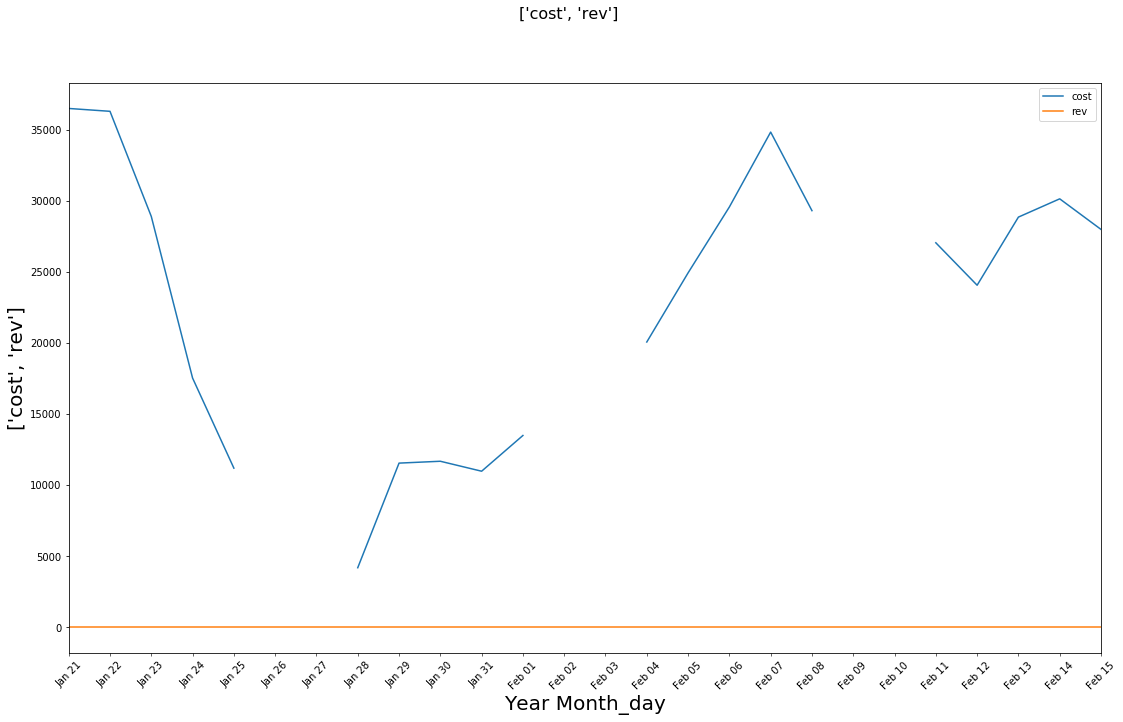

In [18]:
plot_daily_hourly_metrics(df, xcol_name='date', metrics=['cost','rev'])

## Conversion Rate

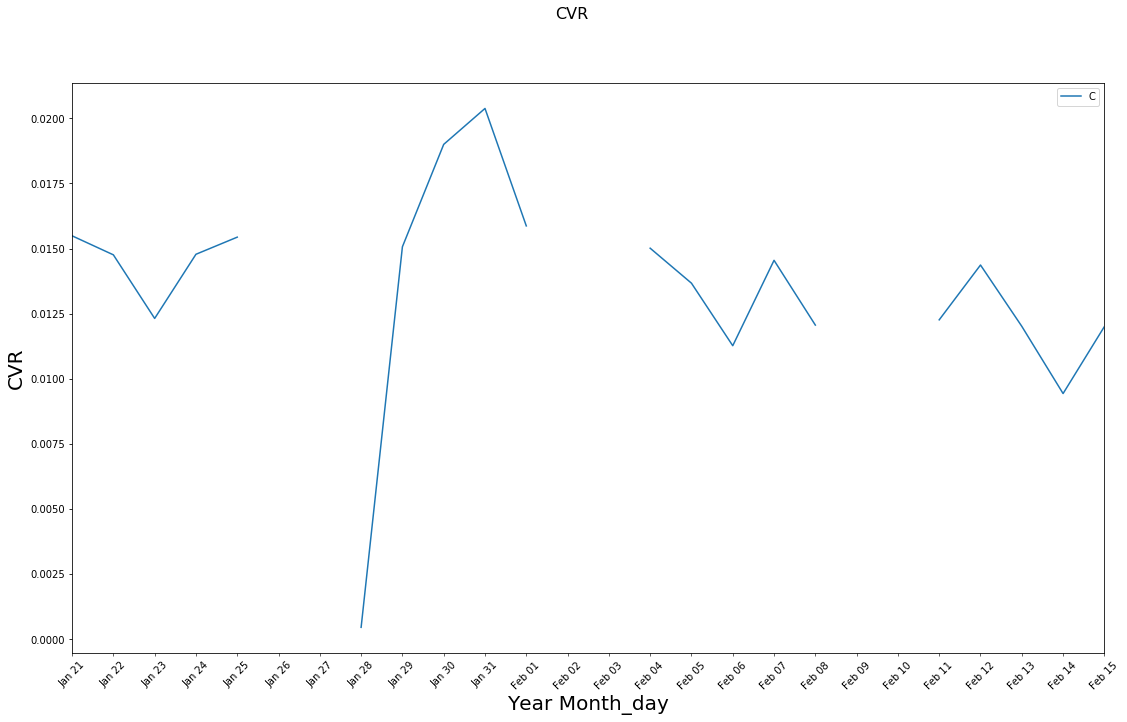

In [19]:
plot_daily_hourly_metrics(df, xcol_name='date', metrics='CVR')

## Conversions

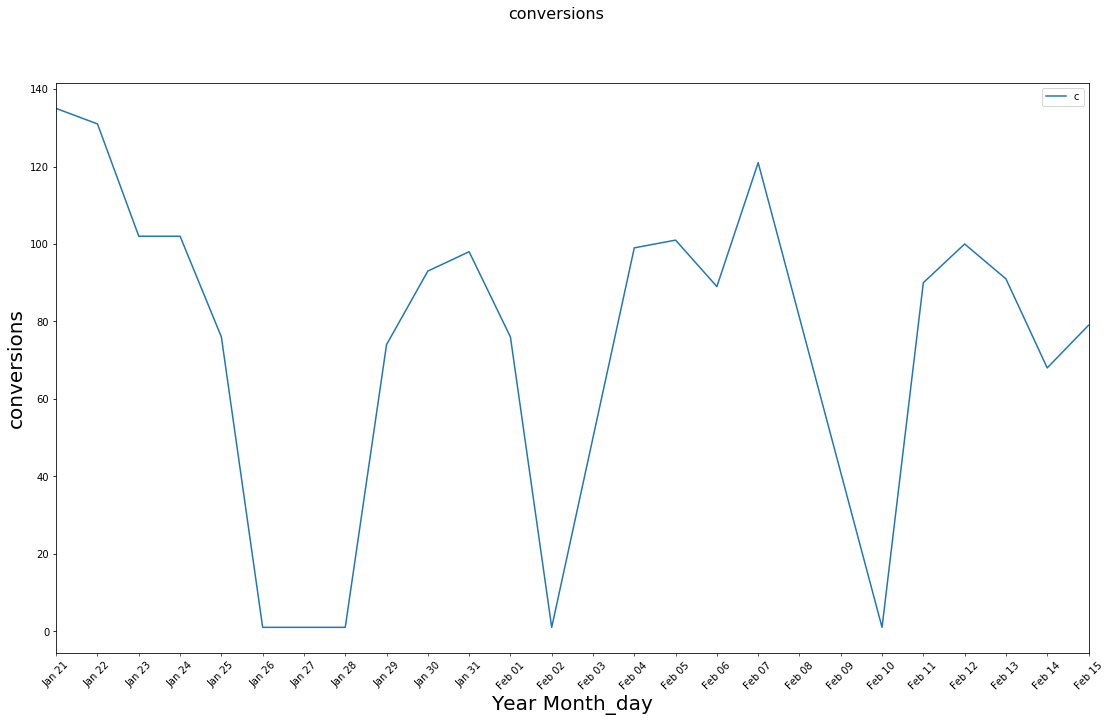

In [20]:
plot_daily_hourly_metrics(df, xcol_name='date', metrics='conversions')

## ROI

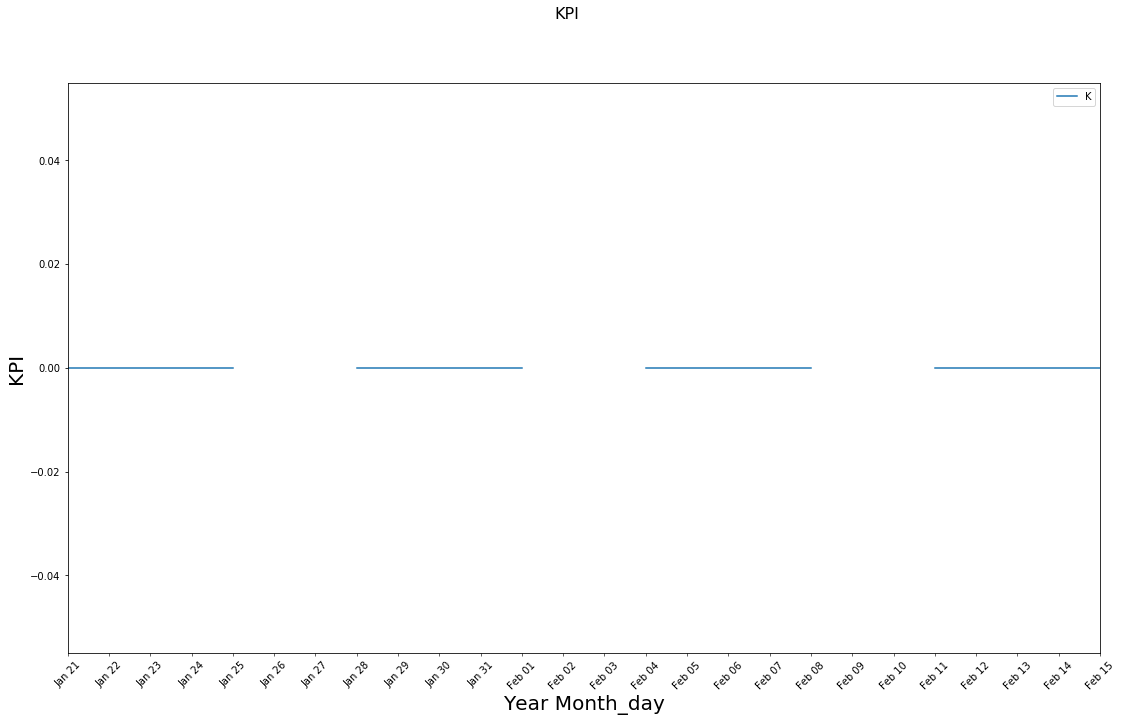

In [21]:
plot_daily_hourly_metrics(df, xcol_name='date', metrics='KPI')